<a href="https://colab.research.google.com/github/nikitabelii/Data-Science/blob/main/Data_Science_2023_MNIST_Nikita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [263]:
%%capture
import numpy as np                #numpy is imported as np for numerical operations
import matplotlib.pyplot as plt   #matplotlib.pyplot is imported as plt for creating plots and visualizations
import torch                      #torch is imported for PyTorch, a popular deep learning framework
from torchvision import datasets  #datasets is imported from torchvision for working with datasets
from skimage.util import montage  #montage is imported from skimage.util for creating montages of images
!pip install wandb
import wandb as wb
from skimage.io import imread

In [264]:
# GPU(data) and GPU_data(data) are functions for converting data to PyTorch tensors with GPU support

def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [265]:
#plot is for grayscale images

def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()

In [266]:
#plotfc is for images displayed with a "cool" colormap

def plotfc(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()

In [267]:
#montage_plot(x) is a function for creating a montage of images and then plotting it

def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [268]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [269]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [270]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [271]:
X.shape

(60000, 1, 28, 28)

In [272]:
x = X[5,0,:,:]

In [273]:
x.shape

(28, 28)

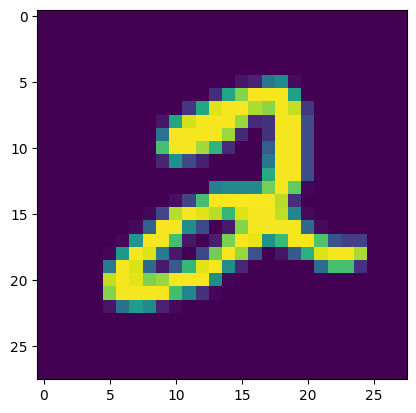

In [274]:
plt.imshow(x)

In [275]:
x = x.reshape(784,1)

In [276]:
x.shape

(784, 1)

In [277]:
plot(x)

In [278]:
x = x.reshape(28,28)

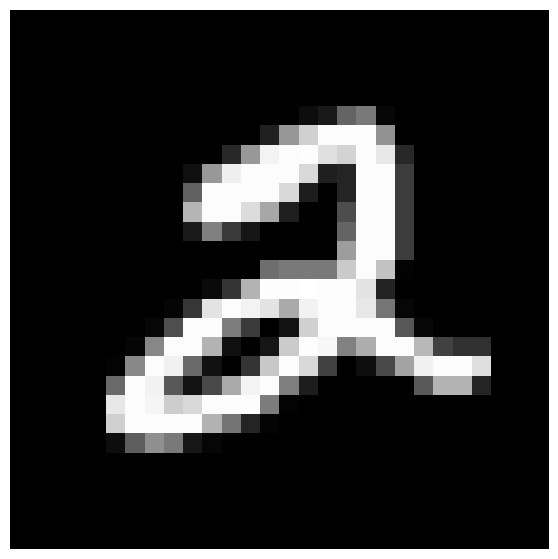

In [279]:
plot(x)

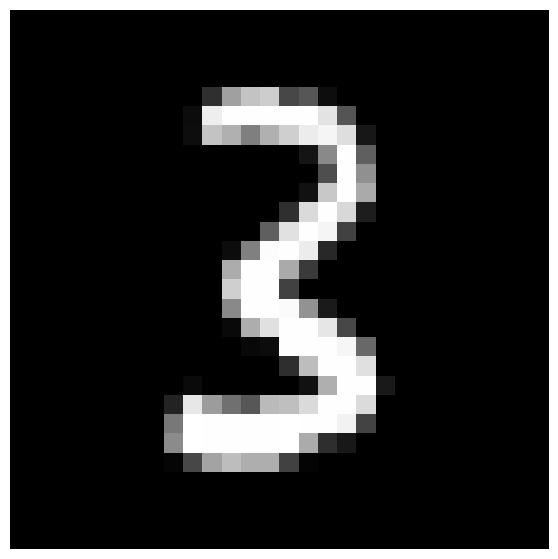

In [280]:
plot(X[50000,0,:,:])

#plot(X[5000 - index, 0 - color channel, : - all raws, : - all columns])

#50000: This is the index of the image you want to retrieve from the dataset. It's selecting the image at index 50000 in the dataset.
#0: The 0 is used to select the channel. In grayscale images, there is usually only one channel, so you select channel 0.
#:, :: These colons are used to select all rows and all columns of the image. In other words, you're selecting the entire image.

In [281]:
Y[120]

2

In [282]:
X[0:25,0,:,:].shape

(25, 28, 28)

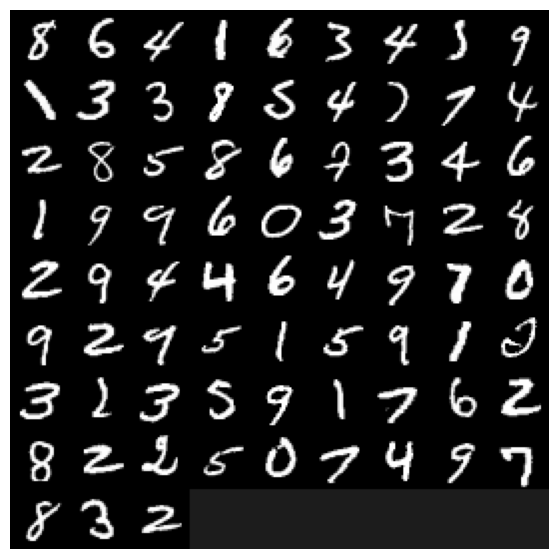

In [283]:
montage_plot(X[125:200,0,:,:])

In [284]:
X.shape[0]

60000

In [285]:
X_test.shape

(10000, 1, 28, 28)

In [286]:
X.shape[0]

60000

In [287]:
X_test.shape[0]

10000

In [288]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [289]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

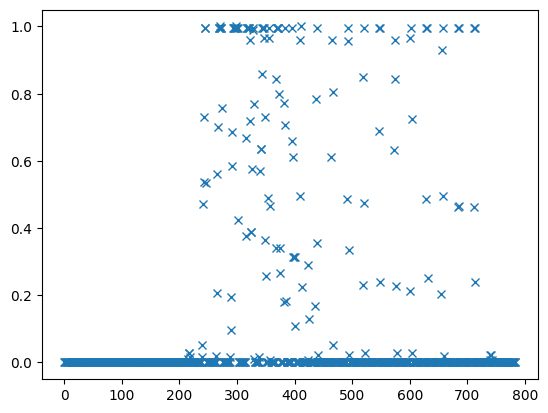

In [290]:
plt.plot(X[101],'x')

In [291]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [292]:
X

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [293]:
X.shape

torch.Size([60000, 784])

In [294]:
X = X.T

In [295]:
X.shape

torch.Size([784, 60000])

In [296]:
x = X[:,13]

In [297]:
Y[13]

tensor(6., device='cuda:0')

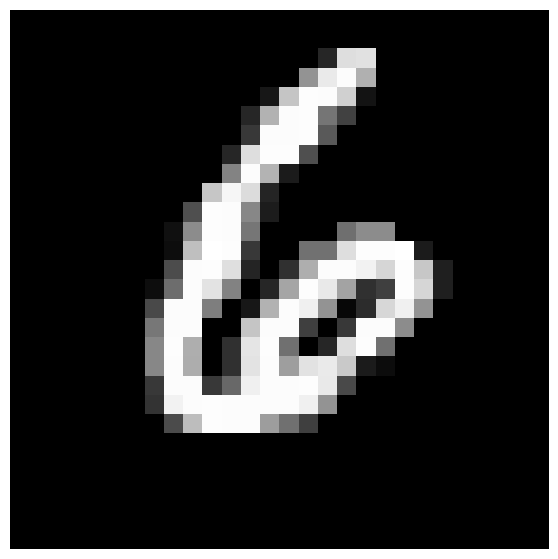

In [298]:
plot(x.reshape(28,28))

In [299]:
M = GPU(np.random.rand(10,784))

In [300]:
M

tensor([[0.3931, 0.5647, 0.8606,  ..., 0.5147, 0.4505, 0.0486],
        [0.2949, 0.0461, 0.8432,  ..., 0.5313, 0.7424, 0.9182],
        [0.8065, 0.2487, 0.4893,  ..., 0.5961, 0.7880, 0.0068],
        ...,
        [0.1473, 0.3042, 0.7857,  ..., 0.6605, 0.4774, 0.9202],
        [0.9269, 0.4257, 0.8841,  ..., 0.4233, 0.6499, 0.8873],
        [0.5389, 0.2906, 0.4003,  ..., 0.5110, 0.5032, 0.5780]],
       device='cuda:0', requires_grad=True)

In [301]:
M.shape, x.shape

(torch.Size([10, 784]), torch.Size([784]))

In [302]:
#basic matrix operations using PyTorch tensors
# matrix multiplication (@) between a random matrix M and an image x
M@x

tensor([59.1843, 55.3271, 57.3050, 55.0632, 55.9103, 56.8338, 53.1096, 51.0430,
        54.5028, 53.7511], device='cuda:0', grad_fn=<MvBackward0>)

In [303]:
y = M@x

In [304]:
y.shape

torch.Size([10])

In [305]:
torch.argmax(y)
#torch.argmax(y) returns the index of the maximum value along the flattened tensor y.
#It essentially finds the position (index) of the largest element in the entire tensor.

tensor(0, device='cuda:0')

In [306]:
torch.max(y,0)
#torch.max(y, 0) returns a tuple containing two elements:
#The second element is the index of the maximum value along dimension 0 of tensor y.
#It is useful when you want to find the maximum value and its corresponding index along a specific dimension of the tensor.

torch.return_types.max(
values=tensor(59.1843, device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor(0, device='cuda:0'))

In [307]:
y = torch.max(y,0)